In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
import datetime
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '/Users/AntoineDaeniker/Documents/EPFL/Master 1/ML_course/projects/project1/data/train.csv' # TODO: download train data and supply path here 
y, tX, tXt, ids = load_csv_data(DATA_TRAIN_PATH)
print(y.shape, tX.shape)

(250000,) (250000, 30)


## Do your thing crazy machine learning thing here :) ...

In [13]:
###### PRE_PROCESSING #######
temp = tX.copy()
tX_norm = np.zeros(tX.shape)
temp[temp == -999] = 0
mean_features = np.mean(temp, axis=0)
std_features = np.std(temp, axis=0)
for i, f in enumerate(tX.T):
    f[f == -999] = mean_features[i]
    #tX_norm[:, i] = f
    tX_norm[:, i] = (f - mean_features[i]) / std_features[i]

tXt_norm = np.c_[np.ones(tX.shape[0]) / tX.shape[0], tX_norm]
#tXt_norm = np.c_[np.ones(len(y)) / len(y), tX_norm]

In [29]:
max_iters = 200
gamma = 2*10**(-3)
batch_size = 1

# Initialization
w_initial = np.random.rand(tXt_norm.shape[1])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = gradient_descent(
    y, tXt_norm, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("\nSGD: execution time={t:.3f} seconds, gamma = {gamma}\n".format(t=exection_time, gamma=gamma))

Gradient Descent(199/199): loss=1.6075436123795963
SGD: execution time=6.912 seconds, gamma = 0.002



In [30]:
w_initial

array([0.50774159, 0.50968855, 0.11056131, 0.40451847, 0.98316279,
       0.64724038, 0.99950776, 0.86882884, 0.93940919, 0.55049408,
       0.5877604 , 0.13841908, 0.3513632 , 0.17640961, 0.34084512,
       0.7469103 , 0.71432554, 0.00796477, 0.66159654, 0.53871021,
       0.49572319, 0.05794641, 0.17336888, 0.91787035, 0.87575921,
       0.17951421, 0.67535057, 0.32086383, 0.82094338, 0.35042642,
       0.88892407])

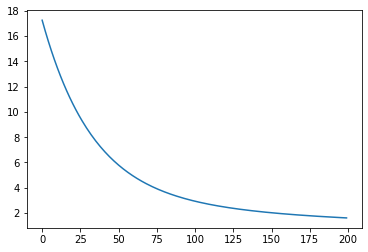

In [31]:
plt.plot(np.arange(max_iters), sgd_losses)

## Generate predictions and save ouput in csv format for submission:

In [24]:
DATA_TEST_PATH = '/Users/AntoineDaeniker/Documents/EPFL/Master 1/ML_course/projects/project1/data/test.csv' # TODO: download train data and supply path here 
y_test, tX_test, tXt_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [32]:
###### PRE_PROCESSING #######
temp_test = tX_test.copy()
tX_norm_test = np.zeros(tX_test.shape)
temp_test[temp_test == -999] = 0
mean_features_test = np.mean(temp_test, axis=0)
std_features_test = np.std(temp_test, axis=0)
for i, f in enumerate(tX_test.T):
    f[f == -999] = mean_features_test[i]
    tX_norm_test[:, i] = (f - mean_features_test[i]) / std_features_test[i]
    
tXt_norm_test = np.c_[np.ones(len(y_test)) / len(y_test), tX_norm_test]

In [33]:
sgd_ws

array([ 0.50774109,  0.12375663,  0.10846068,  0.06284055,  0.43968791,
        0.34502386,  0.65660988,  0.83031256,  0.91507082,  0.16895941,
       -0.07714221,  0.00591713,  0.04866814, -0.06973399,  0.10398134,
        0.38752721,  0.54489729, -0.28536051,  0.31154427,  0.45731475,
        0.05700567,  0.07702042, -0.42958532,  0.32558765,  0.32540989,
        0.10026285,  0.52475978, -0.23879816,  0.53269064,  0.26730822,
        0.22420899])

In [34]:
pred_train = predict_labels(sgd_ws, tXt_norm)
len(pred_train[abs(pred_train-y) == 0]) * 100 / len(y)

55.418

In [35]:
pred_test = predict_labels(sgd_ws, tXt_norm_test)
len(pred_test[abs(pred_test-y_test) == 0]) * 100 / len(y_test)

46.8712053752125

In [196]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

NameError: name 'weights' is not defined